In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
#import tensorflow_addons as tfa
#print(tfa.__version__)
import pickle
#import random
#from sklearn.metrics import f1_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report as cr
#import seaborn as sns

In [33]:
pc2022HopkinsD2 =  pd.DataFrame()
for i in range(1,9):
  path = '../resources/PC2022/d=2/output{}.csv'
  dataFrame = pd.read_csv(path.format(i))
  pc2022HopkinsD2 = pc2022HopkinsD2.append(dataFrame, ignore_index=True)

averages = pc2022HopkinsD2.loc[:, 'avg']
std = pc2022HopkinsD2.loc[:, 'std']
ids = pc2022HopkinsD2.loc[:, 'id']

m = averages[np.argmax(averages)]
print(m)
mmin = averages[np.argmin(averages)]
print(mmin)
  
pc2022HopkinsD2

1.0
0.322681094116007


,id,avg,std
0,10003327,0.622501,0.022690
1,10008016,0.620356,0.029411
2,10009770,0.415780,0.052891
3,10010617,0.784220,0.017968
4,10012036,0.776523,0.013714
...,...,...,...
68648,9970254,0.761754,0.012382
68649,9970373,0.700124,0.012173
68650,9973032,0.759765,0.021468
68651,9990896,0.578914,0.088700


In [34]:
filteredHopkinsD2 = pc2022HopkinsD2[pc2022HopkinsD2['avg'] >= 0.7] 
filteredHopkinsD2

,id,avg,std
3,10010617,0.784220,0.017968
4,10012036,0.776523,0.013714
6,10027741,0.755447,0.014348
9,10040445,0.740865,0.010803
13,10060678,0.784936,0.015689
...,...,...,...
68647,9968008,0.760508,0.012627
68648,9970254,0.761754,0.012382
68649,9970373,0.700124,0.012173
68650,9973032,0.759765,0.021468


In [15]:
length

0.00677318905883993

Text(0.5, 1.0, 'Frequência de Classes x AVG Hopkins Statistics (100 runs)')

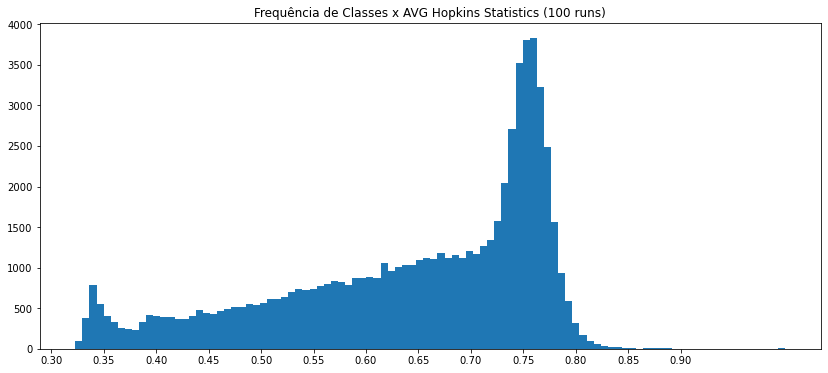

In [35]:
N_points = len(averages)
n_bins = 100
length = (m - mmin)/n_bins
fig, axs = plt.subplots(figsize=(14,6))
#length = 0.025
#plt.figure(figsize=(10,6))
#0.592653975517827
# We can set the number of bins with the *bins* keyword argument.
plt.xticks(np.arange(0.3, 0.9, 0.05))
axs.hist(averages, bins=n_bins)
#plt.xlim(right=0.9)
plt.title('Frequência de Classes x AVG Hopkins Statistics (100 runs)')
#xlim(left=1)

#axs[1].hist(dist2, bins=n_bins)

In [ ]:
# to-do: review: 
# Frequency vs density histograms!!

In [21]:
with open('../resources/class_dictionary.pkl', 'rb') as f:
    data = pickle.load(f)
data

{2683260: 0,
 2683214: 1,
 2683283: 2,
 2683262: 3,
 2683209: 4,
 2683264: 5,
 2683259: 6,
 2683265: 7,
 2683238: 8,
 2683293: 9,
 2683245: 10,
 2683234: 11,
 2683252: 12,
 2683207: 13,
 2683250: 14,
 2683254: 15,
 2683217: 16,
 2683272: 17,
 2683297: 18,
 2683286: 19,
 2683228: 20,
 2683266: 21,
 5284011: 22,
 5284014: 23,
 2683648: 24,
 4000158: 25,
 2683634: 26,
 4000135: 27,
 2683629: 28,
 2683637: 29,
 2683645: 30,
 2683652: 31,
 2683631: 32,
 2683628: 33,
 2683650: 34,
 2683642: 35,
 2683625: 36,
 6067581: 37,
 4000216: 38,
 2683644: 39,
 2683499: 40,
 2683503: 41,
 2683501: 42,
 2683516: 43,
 2683500: 44,
 2683517: 45,
 2683495: 46,
 7729924: 47,
 2683520: 48,
 2683722: 49,
 2683825: 50,
 2683711: 51,
 2683784: 52,
 2683679: 53,
 2683703: 54,
 2683828: 55,
 2683743: 56,
 2683778: 57,
 2683713: 58,
 2683807: 59,
 2683783: 60,
 2683748: 61,
 2683742: 62,
 2683786: 63,
 2683759: 64,
 9848396: 65,
 2683756: 66,
 2683827: 67,
 2683749: 68,
 2683750: 69,
 2683776: 70,
 2683797: 71,
 2

In [36]:
train_images = pd.read_csv('../resources/train_images.csv')
validation_images = pd.read_csv('../resources/validation_images.csv')

In [37]:
train_image_list = train_images['image_paths']
validation_image_list = validation_images['image_paths']

In [38]:
images_by_class = {}
for c in train_image_list:
  split = c.split('/')
  c_id = split[0]
  img = split[1]
  try:
    images_by_class[c_id]
  except Exception:
    images_by_class[c_id] = []
  finally:
    images_by_class[c_id].append(img)
    
for c in validation_image_list:
  split = c.split('/')
  c_id = split[0]
  img = split[1]
  try:
    images_by_class[c_id]
  except Exception:
    images_by_class[c_id] = []
  finally:
    images_by_class[c_id].append(img)
  

In [39]:
# Sanity Check
dataset_classlist = list(data.keys())
l = 0
for i in dataset_classlist:
  l += len(images_by_class[str(i)])
l

2885052

In [40]:
indexes = filteredHopkinsD2['id']
img_quantities = []
for index in indexes:
  img_quantities.append(len(images_by_class[str(index)]))
hop = filteredHopkinsD2['avg']

In [41]:
filteredHopkinsD2_dataframe = pd.DataFrame({'ids': indexes, 'img_quantities': img_quantities, 'hopkins': hop })
filteredHopkinsD2_dataframe = filteredHopkinsD2_dataframe.reset_index(drop=True)
filteredHopkinsD2_dataframe

,ids,img_quantities,hopkins
0,10010617,101,0.784220
1,10012036,99,0.776523
2,10027741,73,0.755447
3,10040445,73,0.740865
4,10060678,94,0.784936
...,...,...,...
31166,9968008,90,0.760508
31167,9970254,101,0.761754
31168,9970373,50,0.700124
31169,9973032,56,0.759765


In [42]:
filteredHopkinsD2_dataframe = filteredHopkinsD2_dataframe[filteredHopkinsD2_dataframe['img_quantities'] >= 10]
filteredHopkinsD2_dataframe

,ids,img_quantities,hopkins
0,10010617,101,0.784220
1,10012036,99,0.776523
2,10027741,73,0.755447
3,10040445,73,0.740865
4,10060678,94,0.784936
...,...,...,...
31166,9968008,90,0.760508
31167,9970254,101,0.761754
31168,9970373,50,0.700124
31169,9973032,56,0.759765


In [43]:
filteredHopkinsD2_dataframe.to_csv('pc2022_clusterable_classes.csv')

In [14]:
N_points

68653

In [73]:
N_points

31403

In [77]:
lenght

12.333333333333334

151
3


Text(0.5, 1.0, 'Frequência de Classes Particionáveis (Hopkins D=2) Vs Qtd. Imagens')

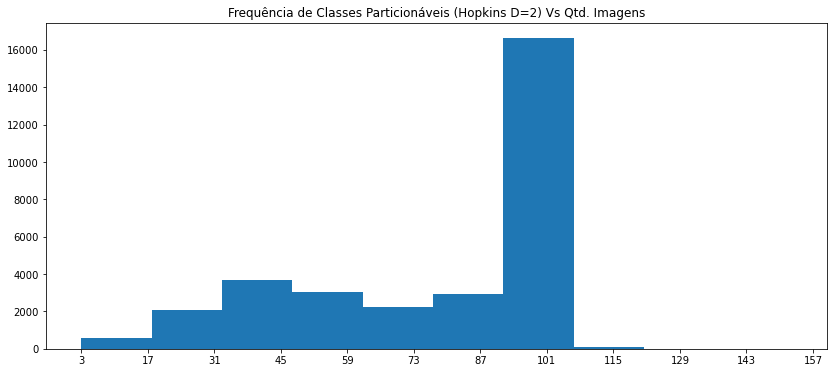

In [28]:
mmax = filteredHopkinsD2_dataframe['img_quantities'][np.argmax(filteredHopkinsD2_dataframe['img_quantities'])]
print(mmax)
mmin = filteredHopkinsD2_dataframe['img_quantities'][np.argmin(filteredHopkinsD2_dataframe['img_quantities'])]
print(mmin)

N_points = len(filteredHopkinsD2_dataframe['ids'])
n_bins = 10
lenght = (mmax - mmin)/n_bins
fig, axs = plt.subplots(figsize=(14,6))

#plt.figure(figsize=(10,6))
#0.592653975517827
# We can set the number of bins with the *bins* keyword argument.
plt.xticks(np.arange(3, 160, int(lenght)))
axs.hist(filteredHopkinsD2_dataframe['img_quantities'], bins=n_bins)
plt.xlim(right=160)
plt.title('Frequência de Classes Particionáveis (Hopkins D=2) Vs Qtd. Imagens')

#xlim(left=1)

#axs[1].hist(dist2, bins=n_bins)